# **Big Project (Homework Assignemnt- 03)**
# **Lazy FCA (Formal Concept Analysis) Classifcation.**

# Titanic Dataset: Exploratory Data Analysis & Feature Binarization

This notebook explores the Titanic dataset, performs exploratory data analysis (EDA), and demonstrates how to binarize the dataset for machine learning tasks. We will also discuss the rationale behind each feature transformation step.

---


# Importing libraries

In [19]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Step 2: Load Titanic Dataset

Let's load the Titanic dataset and inspect the first few rows.


In [20]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Exploratory Data Analysis (EDA)
EDA helps us explore and understand the dataset by summarizing its main characteristics.  
In this step, we:
- Analyze the dataset's structure and summary statistics.
- Visualize missing data and relationships between key features.
- Identify columns that are irrelevant or require preprocessing.



--- Exploratory Data Analysis ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare  

<ipython-input-21-1c64b53db21c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='pastel')


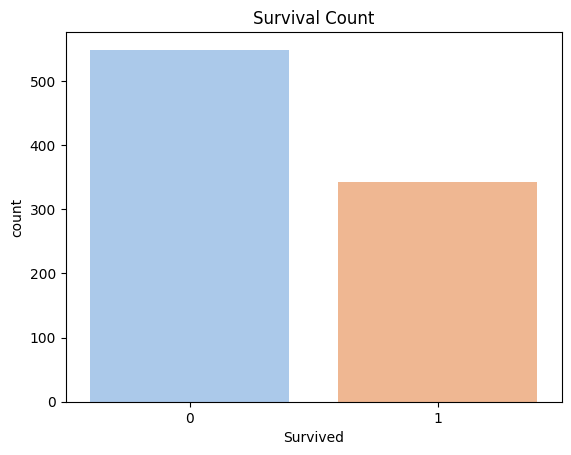

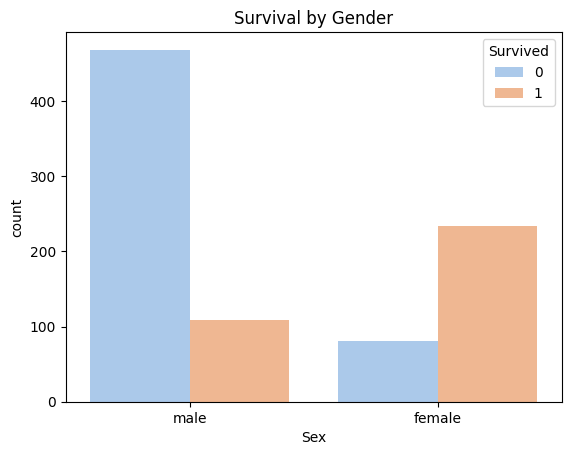

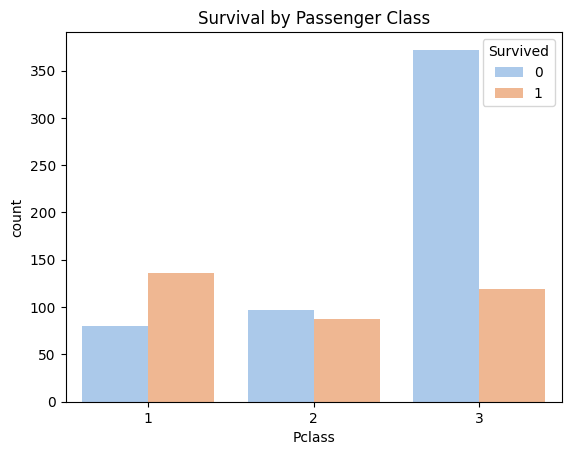

In [21]:
# 1. Exploratory Data Analysis
print("\n--- Exploratory Data Analysis ---\n")

# General dataset info
print("Dataset Info:")
df.info()

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing survival rate
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title("Survival Count")
plt.show()

# Analyzing survival rate by gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Survival by Gender")
plt.show()

# Analyzing survival rate by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title("Survival by Passenger Class")
plt.show()

##  Feature Binarization
Feature binarization transforms dataset features into a binary format or categorical format suitable for machine learning.

### Transformation Details:
- **Survived**: Already binary (0 = did not survive, 1 = survived).  
- **Pclass**: One-hot encoded into separate columns for each class.  
- **Sex**: Binary-encoded (1 = male, 0 = female).  
- **Age**: Binned into age groups (`<18`, `18-35`, `36-60`, `>60`).  
- **SibSp & Parch**: Kept as is (numeric).  
- **Fare**: Binned into ranges (`<10`, `10-50`, `>50`).  
- **Embarked**: One-hot encoded for ports (`S`, `C`, `Q`).  
- **Cabin**: Binary-encoded based on whether a cabin number is present or not.  



In [22]:
# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns=columns_to_drop)
print("\nDropped irrelevant columns: ", columns_to_drop)

# Fill missing values
# Filling missing Age with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filling missing Embarked with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Filling missing Cabin information with "No_Cabin"
df['Cabin'] = df['Cabin'].fillna('No_Cabin')

print("\nDataset after filling missing values:")
display(df.head())


Dropped irrelevant columns:  ['PassengerId', 'Name', 'Ticket']

Dataset after filling missing values:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No_Cabin,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,No_Cabin,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,No_Cabin,S


### Why Binarization?
Binarization:
- Simplifies categorical data for models requiring numerical input.
- Reduces the dimensionality of features while preserving meaningful distinctions.

## Save the Transformed Dataset
The binarized dataset is saved in CSV format for further use.  
This ensures that the transformed data is accessible for training machine learning models.


In [23]:
# 2. Binarizing the Dataset
print("\n--- Binarizing Dataset ---\n")


# Binarizing Pclass
df['Pclass_1'] = (df['Pclass'] == 1).astype(int)
df['Pclass_2'] = (df['Pclass'] == 2).astype(int)
df['Pclass_3'] = (df['Pclass'] == 3).astype(int)

# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)

# Binning Age into categories
df['Age_<18'] = (df['Age'] < 18).astype(int)
df['Age_18-35'] = ((df['Age'] >= 18) & (df['Age'] <= 35)).astype(int)
df['Age_36-60'] = ((df['Age'] > 35) & (df['Age'] <= 60)).astype(int)
df['Age_>60'] = (df['Age'] > 60).astype(int)

# Binning Fare into categories
df['Fare_<10'] = (df['Fare'] < 10).astype(int)
df['Fare_10-50'] = ((df['Fare'] >= 10) & (df['Fare'] <= 50)).astype(int)
df['Fare_>50'] = (df['Fare'] > 50).astype(int)

# Creating a feature to indicate if Cabin information exists
df['Has_Cabin'] = (df['Cabin'] != 'No_Cabin').astype(int)

# Dropping the original Cabin and Embarked columns
df = df.drop(columns=['Pclass','Cabin', 'Embarked', 'Age', 'Fare'])

print("Binarized Dataset:")
display(df.head())

# Save the binarized dataset to a new CSV
binarized_file_path = "binarized_titanic.csv"
df.to_csv(binarized_file_path, index=False)
print(f"Binarized dataset saved to {binarized_file_path}.")


--- Binarizing Dataset ---

Binarized Dataset:


,Survived,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_S,Embarked_C,Embarked_Q,Age_<18,Age_18-35,Age_36-60,Age_>60,Fare_<10,Fare_10-50,Fare_>50,Has_Cabin
0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
2,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0
3,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1
4,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0


Binarized dataset saved to binarized_titanic.csv.
